In [4]:
import numpy as np
import torch
from timm import create_model

feature_extractor = create_model(
    'resnet18',
    pretrained=False,
    features_only=True
)
feature_extractor.load_state_dict(torch.load('../pretrained/resnet18.pth'))

batch_size = 5
img = torch.randn(batch_size, 3, 256, 256)
for i, v in enumerate(feature_extractor(img)):
    print(f'{i} : {v.shape}')

0 : torch.Size([5, 64, 128, 128])
1 : torch.Size([5, 64, 64, 64])
2 : torch.Size([5, 128, 32, 32])
3 : torch.Size([5, 256, 16, 16])
4 : torch.Size([5, 512, 8, 8])


In [25]:
import torch

outputs = torch.randn(8, 2, 4, 4)
flattened = torch.flatten(outputs[:, 1, :], start_dim=1)
anomaly_score_i = torch.topk(flattened, 5)[0].mean(dim=1)
d = np.array([1, 2, 3, 4]).reshape(2, 2)
d = d.reshape(-1)

Compute PRO curve...
Sort 4 anomaly scores...


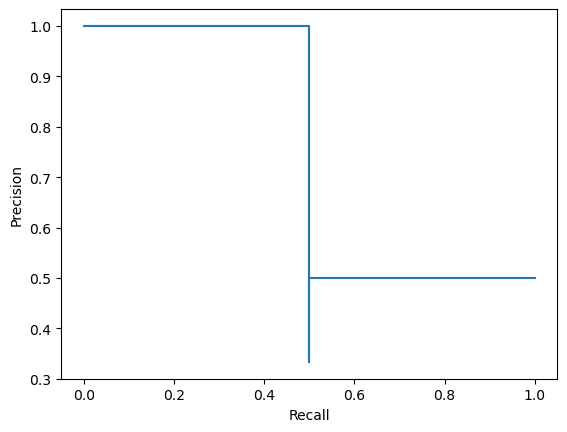

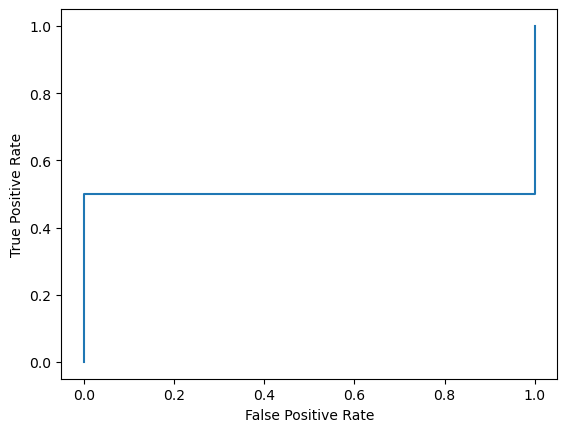

In [3]:
from sklearn.metrics import precision_recall_curve, RocCurveDisplay, auc, PrecisionRecallDisplay, roc_curve
import numpy as np
from metrics import compute_pro
from metrics.generic_util import trapezoid

# y_true = np.random.randint(low=0, high=2, size=(5, 20, 20))
# y_pred = np.random.random((5, 20, 20))
y_true = np.array([1, 0, 0, 1, ], dtype=np.int32)
y_pred = np.array([0.9, 0.8, 0.7, 0.6, ], dtype=np.float32)
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
# pr_display = PrecisionRecallDisplay(precision=precision, recall=recall).plot()
# RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
all_fprs, all_pros = compute_pro(y_pred.reshape(-1, 1, 1), y_true.reshape(-1, 1, 1))